Computational Exercise
--

In [1]:
using Distributions
using GLM
using DataFrames
using PyPlot

In [2]:
function sim(n=200, ρ=0.5)
    v1 = rand(Uniform(0,sqrt(12)),n)
    v2 = rand(Uniform(0,sqrt(12)),n)
    data = DataFrame(y = 1 .+ v1 + sqrt(1-ρ^2)*v2+ρ*v1 + rand(Normal(),n), X1 = v1, X2 = sqrt(1-ρ^2)*v2+ρ*v1)
    a = fit(LinearModel, y ~ X1 + X2, data)
    X = hcat(ones(n), data[:X1], data[:X2])
    return vcat(coef(a), deviance(a)/(200-3), [1 1 1]*coef(a), ([1 1 1]*coef(a) - 3) / 
        sqrt(deviance(a)/(200-3)*[1 1 1]*inv(X'*X)*[1; 1; 1]) )
end

sim (generic function with 3 methods)

In [4]:
simulations = Array(Float64, 10000, 6)
for i in 1:10000
    simulations[i,:] = sim()
end

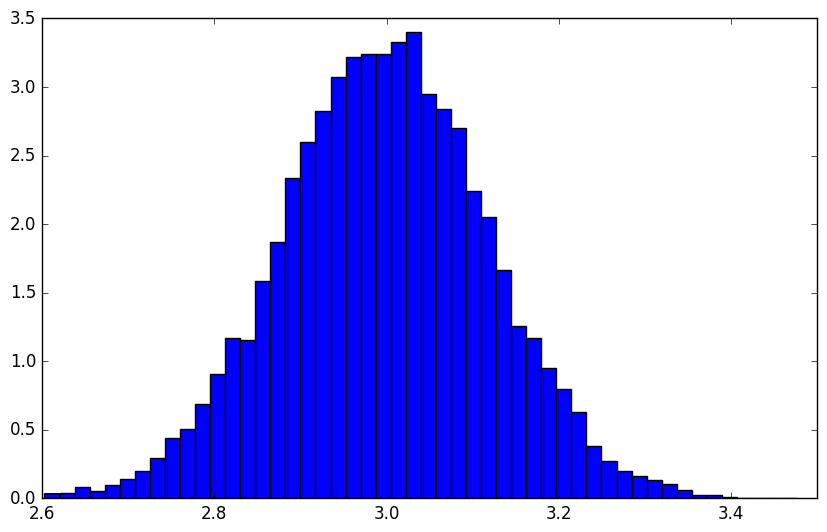

In [5]:
figure(figsize=(10,6))
plt[:hist](simulations[:,5],50, normed=true);

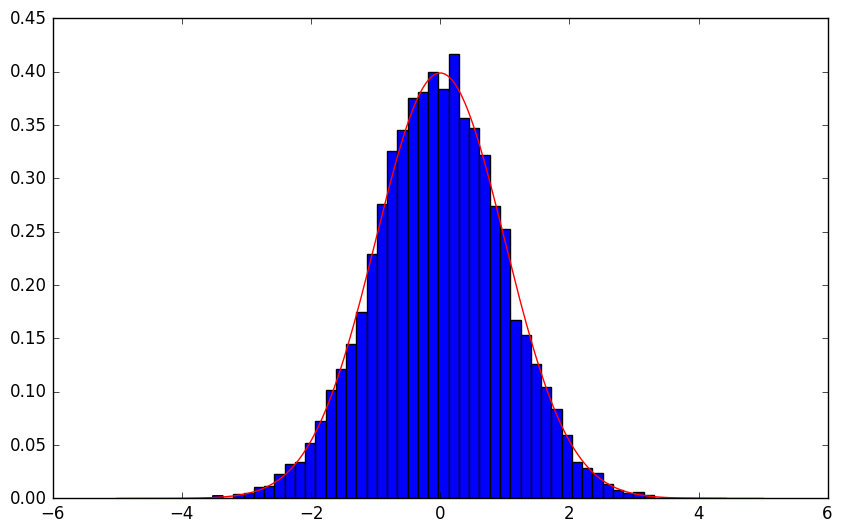

In [6]:
figure(figsize=(10,6))
plt[:hist](simulations[:,6],50, normed=true);
plot(linspace(-5,5,200), pdf(Normal(),linspace(-5,5,200)), color="r");

Looks very normally distributed! But then again, the $\beta$'s are asymptotically normal distributed, so is their normalized sum.